# Suicides Rates Overview from 1985-2016

In [1]:
## Here we are importing the modules we need for Data analysis 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Importing the data

In [2]:
suicides = pd.read_csv('master.csv') #We are importing the dataset from a local folder

In [4]:
suicides.head(10) #This is what the top 10 rows of data look like 

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


## Exploring and Cleaning our data 

Let's see how many null values we have in total 

In [5]:
suicides.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [ ]:
##Here is how we drop null values
#suicides.dropna(inplace=True)

We don't need a few of these columns for this example, so we can do this: 

In [22]:
cleaned = suicides.drop(columns=['country-year', 'HDI for year'])

In [94]:
cleaned #Here's what our data looks like with country-year and HDI for year taken out 

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X


In [35]:
cleaned['country'].unique() #Here are all the countries we have in our dataset 

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

## I want to see the number of baby boomers that committed suicide in the oldest year in the dataset. I want to see them for each country. 

In [29]:
## To find the earliest and most recent years, we can do this: 
min_year = cleaned['year'].min()
max_year = cleaned['year'].max()

In [30]:
min_year

1985

In [31]:
max_year

2016

In [32]:
## We need to get the data we want from 1985 
get_1985 = cleaned[cleaned['year']==min_year]

In [34]:
## Here is our data for 1985
get_1985.head(10) 

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
264,Antigua and Barbuda,1985,female,15-24 years,0,7709,0.0,"240,923,926",3850,Generation X
265,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.0,"240,923,926",3850,Boomers
266,Antigua and Barbuda,1985,female,35-54 years,0,6173,0.0,"240,923,926",3850,Silent
267,Antigua and Barbuda,1985,female,5-14 years,0,7339,0.0,"240,923,926",3850,Generation X
268,Antigua and Barbuda,1985,female,55-74 years,0,3778,0.0,"240,923,926",3850,G.I. Generation
269,Antigua and Barbuda,1985,female,75+ years,0,949,0.0,"240,923,926",3850,G.I. Generation
270,Antigua and Barbuda,1985,male,15-24 years,0,7667,0.0,"240,923,926",3850,Generation X
271,Antigua and Barbuda,1985,male,25-34 years,0,6194,0.0,"240,923,926",3850,Boomers
272,Antigua and Barbuda,1985,male,35-54 years,0,5970,0.0,"240,923,926",3850,Silent
273,Antigua and Barbuda,1985,male,5-14 years,0,7304,0.0,"240,923,926",3850,Generation X


In [36]:
## Now we need all the data about baby boomers in this year 
get_boomers = get_1985[get_1985['generation']=='Boomers']

In [38]:
get_boomers.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
265,Antigua and Barbuda,1985,female,25-34 years,0,6344,0.00,"240,923,926",3850,Boomers
271,Antigua and Barbuda,1985,male,25-34 years,0,6194,0.00,"240,923,926",3850,Boomers
592,Argentina,1985,male,25-34 years,177,2234200,7.92,"88,416,668,900",3264,Boomers
596,Argentina,1985,female,25-34 years,65,2185200,2.97,"88,416,668,900",3264,Boomers
1427,Australia,1985,male,25-34 years,357,1299100,27.48,"180,190,994,861",12374,Boomers
1435,Australia,1985,female,25-34 years,64,1275900,5.02,"180,190,994,861",12374,Boomers
1789,Austria,1985,male,25-34 years,232,548783,42.28,"69,386,774,475",9759,Boomers
1794,Austria,1985,female,25-34 years,56,544765,10.28,"69,386,774,475",9759,Boomers
2362,Bahamas,1985,female,25-34 years,0,19500,0.00,"2,320,699,900",11393,Boomers
2368,Bahamas,1985,male,25-34 years,0,19100,0.00,"2,320,699,900",11393,Boomers


In [43]:
## How many boomers are in the data set
get_boomers['generation'].value_counts()

Boomers    96
Name: generation, dtype: int64

In [56]:
## How many baby boomers committed suicide for each country in 1985 
get_numberOfSuicides = get_boomers.groupby('country')[['suicides_no']].sum() 

In [58]:
get_numberOfSuicides.head(10)

,suicides_no
country,
Antigua and Barbuda,0
Argentina,242
Australia,421
Austria,288
Bahamas,0
Bahrain,7
Barbados,3
Belgium,323
Brazil,1060


In [62]:
## If we want to get the 5 countries with the highest boomer suicide rates in 1985 
get_numberOfSuicides.sort_values(by='suicides_no',ascending=False).head()

,suicides_no
country,
United States,6376
Japan,2799
France,1939
Sri Lanka,1450
Brazil,1060


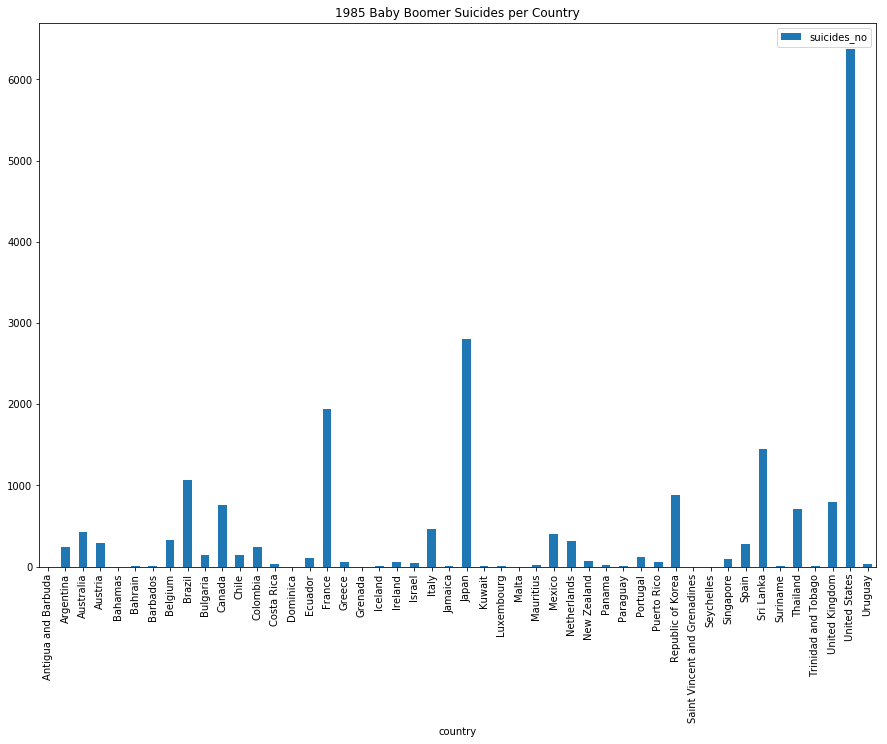

In [64]:
## Here's how we make a bar graph for the data 
get_numberOfSuicides.plot.bar(title='1985 Baby Boomer Suicides per Country',figsize=(15,10))

# This is good, but what if I wanted a different year and generation? 

### Let's create a function to plot suicide rates for different years and generations

In [102]:
## define a function with arguments year and generation
def generation_suicides(year, generation): 
    get_year = cleaned[cleaned['year']==year]
    get_gen = get_year[get_year['generation']==generation]
    get_numbers = get_gen.groupby('country')[['suicides_no']].sum() 
    get_numbers.plot.bar(title=str(year)+ ' Number of '+ generation +' Suicides per Country',figsize=(15,13))

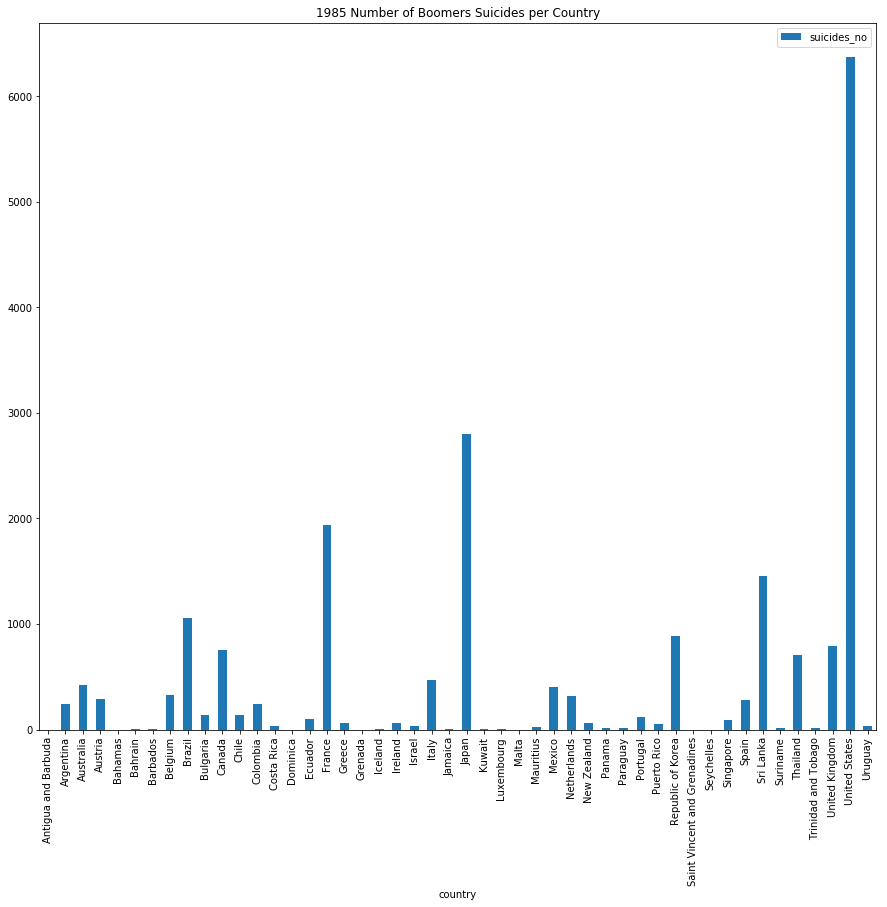

In [106]:
generation_suicides(1985, 'Boomers')

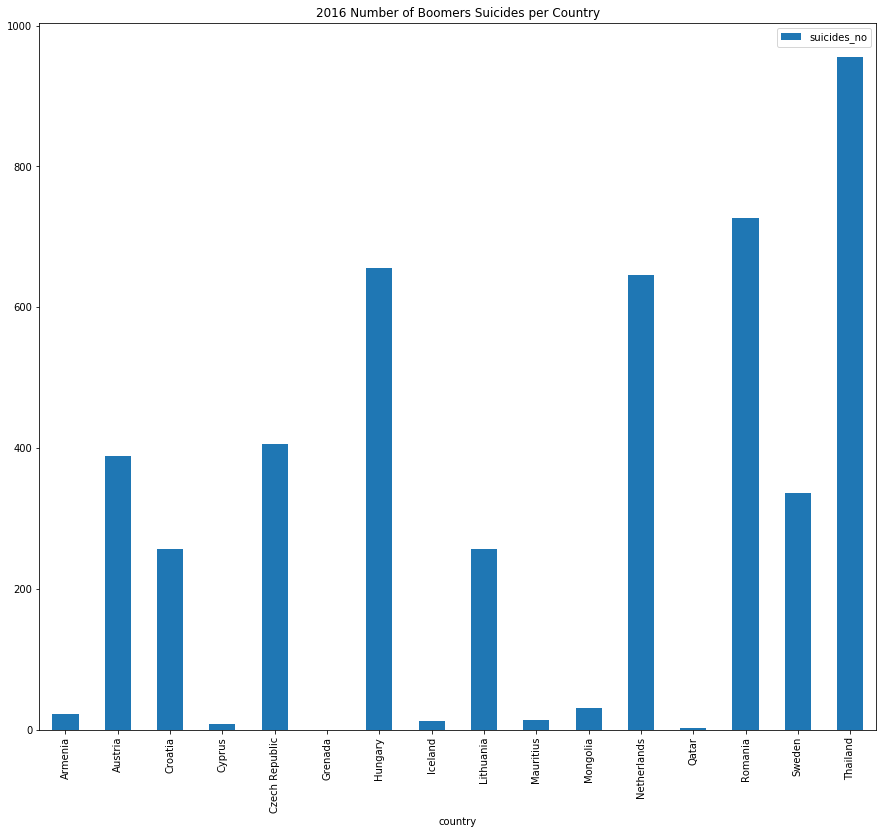

In [105]:
generation_suicides(2016, 'Boomers')